In [1]:
from utils import train_model, evaluate_model, display_model_predictions
from dataset import get_dataloaders, EMOTIONS_TO_IDX
from torchvision import models
import torch
import torch.nn as nn
import torch.optim as optim
import warnings

warnings.filterwarnings("ignore")

EMOTIONS_TO_IDX

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [4]:
train = 0
model = models.resnet18(pretrained=True)
num_epochs = 100
num_classes = len(EMOTIONS_TO_IDX.values())
model.fc = nn.Linear(model.fc.in_features, num_classes)

train_loader, test_loader = get_dataloaders("data")

if train:
    # Get dataloaders
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.CrossEntropyLoss()

    # Train the model
    train_model(
        model=model,
        train_loader=train_loader,
        criterion=criterion,
        optimizer=optimizer,
        num_epochs=num_epochs,
        device=device,
    )
else:
    # Load the model
    model.load_state_dict(torch.load("ResNet_epoch_66.pth", map_location=device))
    model.to(device)
    model.eval()

In [5]:
eval = 1
if eval:
    evaluate_model(model=model, test_loader=test_loader, device=device)

Evaluating: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s, current_acc=61.81%]

Final Accuracy: 61.81%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.7241396].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.39626682..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.558952..1.82].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5247024..1.82].


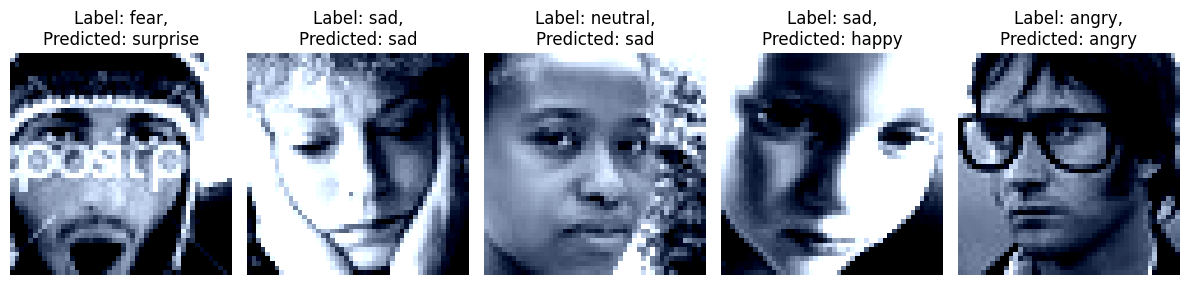

In [6]:
display_model_predictions(
    model=model,
    test_loader=test_loader,
    classes_dict={v: k for k, v in EMOTIONS_TO_IDX.items()},
)